<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/fNIRS_from_mat_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget http://meusite.mackenzie.br/rogerio/data_load/fNIRS_04.mat

--2021-10-14 05:10:37--  http://meusite.mackenzie.br/rogerio/data_load/fNIRS_04.mat
Resolving meusite.mackenzie.br (meusite.mackenzie.br)... 168.197.92.228
Connecting to meusite.mackenzie.br (meusite.mackenzie.br)|168.197.92.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8018236 (7.6M)
Saving to: ‘fNIRS_04.mat’

fNIRS_04.mat        100%[===================>]   7.65M   466KB/s    in 19s     

2021-10-14 05:10:59 (410 KB/s) - ‘fNIRS_04.mat’ saved [8018236/8018236]



In [46]:
import scipy.io
import numpy as np
import pandas as pd

mat_file = '/content/fNIRS_04.mat'

import scipy.io
import pandas as pd

mat = scipy.io.loadmat('/content/fNIRS_04.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}

for e in ['dat','mrk','mnt','nfo']:
  mat.pop(e, None)

data = pd.DataFrame({k: pd.Series(v[:,0]) for k, v in mat.items()})

data.to_csv("fNIRS_04.csv",index=None)



In [47]:
df = pd.read_csv('/content/fNIRS_04.csv')
df.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,ch17,ch18,ch19,ch20,ch21,ch22,ch23,ch24,ch25,ch26,ch27,ch28,ch29,ch30,ch31,ch32,ch33,ch34,ch35,ch36,ch37,ch38,ch39,ch40
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000716,-0.000349,-0.002710,0.001666,-0.007190,0.015394,0.003002,0.002948,-0.028939,-0.000060,-0.001008,0.005140,-0.007055,0.001687,0.006546,0.007965,0.000782,-0.006128,0.000205,0.007769,-0.001022,-0.002008,0.011365,-0.002105,0.006319,-0.004215,-0.002690,-0.005530,0.018126,-0.001609,0.000685,-0.001657,0.006738,-0.003885,-0.012894,-0.005747,-0.002355,0.007634,0.001481,-0.006945
2,-0.000719,0.000612,0.008509,-0.000649,-0.002274,-0.007407,-0.005073,-0.003179,0.034263,-0.001187,-0.001573,-0.017123,0.002524,-0.003247,-0.023545,0.001702,0.000138,0.002618,0.014274,0.006550,0.000392,-0.002324,-0.008258,-0.001145,-0.004637,0.017540,0.001489,-0.002493,-0.029925,-0.002505,0.001081,0.022590,-0.001649,0.005433,0.026026,0.000306,-0.002188,-0.003101,-0.014496,-0.011631
3,0.000651,-0.006225,-0.005608,-0.002382,-0.007662,-0.014024,0.000209,-0.003807,0.001661,-0.005821,-0.000783,-0.005853,-0.006759,-0.008311,-0.038144,0.000102,-0.001825,-0.016186,-0.007871,0.008480,-0.000732,0.004225,0.009798,-0.000799,0.002169,0.024347,-0.006741,-0.007183,0.000983,-0.000694,0.000076,0.003704,0.006239,0.006804,0.051228,-0.001268,-0.000679,0.018987,0.009556,-0.013903
4,0.001584,0.000626,-0.009063,-0.001247,-0.000600,0.014938,0.004500,0.006112,-0.046114,0.001928,0.000169,-0.003999,-0.001827,-0.001137,-0.030491,0.007814,0.001250,0.002693,-0.008071,0.013107,-0.000478,-0.002065,0.016049,-0.001489,-0.002297,-0.006322,-0.005227,-0.005036,0.042446,-0.002254,0.000819,0.003589,0.004126,0.001215,0.043842,-0.004679,0.001051,-0.000833,0.008065,-0.010390


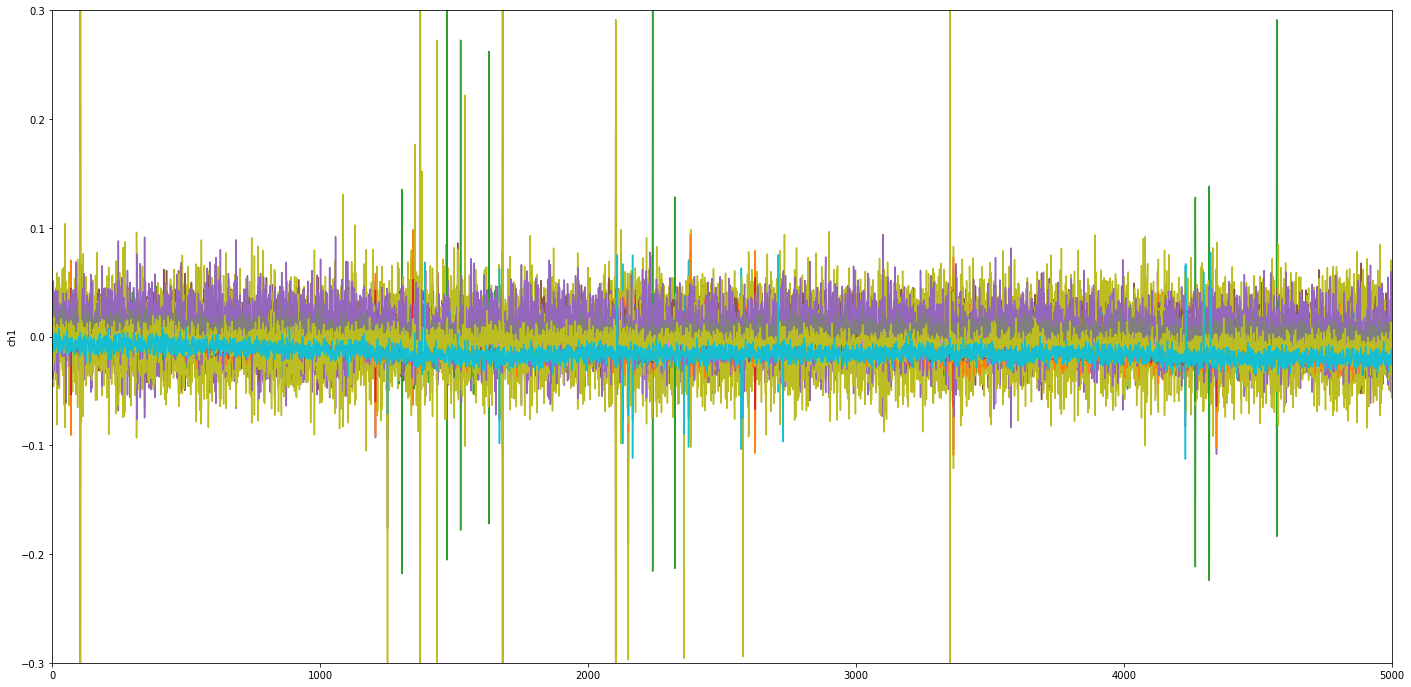

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize=(24,12))

for c in df:
  sns.lineplot(x=df.index,y=df[c])

plt.xlim([0,5000])
plt.ylim([-0.3,0.3])
plt.show()